In [63]:
%load_ext autoreload
%autoreload 2
import convert
file = "./data/nc/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200.nc"
convert.nc2gtiff(file)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
nc2gtiff
geotiff2geotiff
nc2gtiff
geotiff2geotiff


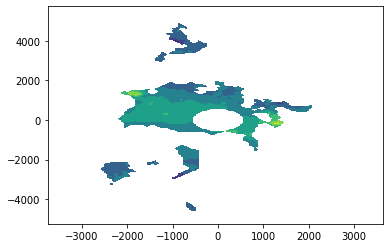

In [31]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
nc = Dataset(file)
lat = nc.variables["lat"][:]
X = nc.variables["xc"][:]
Y = nc.variables["yc"][:]
Z = nc.variables["dX"][0]
Z[lat>85]=np.nan
plt.contourf(X,Y,Z)

In [47]:
nc.variables["xc"][:]

masked_array(data=[-3750. , -3687.5, -3625. , -3562.5, -3500. , -3437.5,
                   -3375. , -3312.5, -3250. , -3187.5, -3125. , -3062.5,
                   -3000. , -2937.5, -2875. , -2812.5, -2750. , -2687.5,
                   -2625. , -2562.5, -2500. , -2437.5, -2375. , -2312.5,
                   -2250. , -2187.5, -2125. , -2062.5, -2000. , -1937.5,
                   -1875. , -1812.5, -1750. , -1687.5, -1625. , -1562.5,
                   -1500. , -1437.5, -1375. , -1312.5, -1250. , -1187.5,
                   -1125. , -1062.5, -1000. ,  -937.5,  -875. ,  -812.5,
                    -750. ,  -687.5,  -625. ,  -562.5,  -500. ,  -437.5,
                    -375. ,  -312.5,  -250. ,  -187.5,  -125. ,   -62.5,
                       0. ,    62.5,   125. ,   187.5,   250. ,   312.5,
                     375. ,   437.5,   500. ,   562.5,   625. ,   687.5,
                     750. ,   812.5,   875. ,   937.5,  1000. ,  1062.5,
                    1125. ,  1187.5,  1250. ,  1312

In [48]:
nc.variables["yc"][:]

masked_array(data=[ 5750. ,  5687.5,  5625. ,  5562.5,  5500. ,  5437.5,
                    5375. ,  5312.5,  5250. ,  5187.5,  5125. ,  5062.5,
                    5000. ,  4937.5,  4875. ,  4812.5,  4750. ,  4687.5,
                    4625. ,  4562.5,  4500. ,  4437.5,  4375. ,  4312.5,
                    4250. ,  4187.5,  4125. ,  4062.5,  4000. ,  3937.5,
                    3875. ,  3812.5,  3750. ,  3687.5,  3625. ,  3562.5,
                    3500. ,  3437.5,  3375. ,  3312.5,  3250. ,  3187.5,
                    3125. ,  3062.5,  3000. ,  2937.5,  2875. ,  2812.5,
                    2750. ,  2687.5,  2625. ,  2562.5,  2500. ,  2437.5,
                    2375. ,  2312.5,  2250. ,  2187.5,  2125. ,  2062.5,
                    2000. ,  1937.5,  1875. ,  1812.5,  1750. ,  1687.5,
                    1625. ,  1562.5,  1500. ,  1437.5,  1375. ,  1312.5,
                    1250. ,  1187.5,  1125. ,  1062.5,  1000. ,   937.5,
                     875. ,   812.5,   750. ,   687

In [77]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Daily Low Resolution Sea Ice Displacement from OSI SAF EUMETSAT
    product_id: OSI-405
    product_name: osi_saf_lr_ice_drift
    product_status: operational
    abstract: Gridded ice displacement fields obtained from  satellite  image
processing. It is a low resolution product (62.5km resolution).
The time span of  the  ice  displacement  is  approximately  48
hours. This dataset is intended both for  process  studies  and
data assimilation. Daily products  are  freely  available  from
the  OSI SAF distribution chain.
    topiccategory: Oceans ClimatologyMeteorologyAtmosphere
    keywords: Sea Ice Motion,Sea Ice,Oceanography,Meteorology,Climate,Remote Sensing
    gcmd_keywords: Cryosphere > Sea Ice > Sea Ice Motion
Oceans > Sea Ice > Sea Ice Motion
Geographic Region > Northern Hemisphere
Vertical Location > Sea Surface
EUMETSAT/OSISAF > Satellite Application Facility on Ocean a

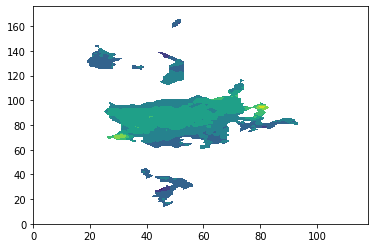

In [76]:
import gdal
import numpy as np
from mayavi import mlab

ds = gdal.Open('./data/tiff_raw/ice_drift_nh_polstere-625_multi-oi_201902271200-201903011200_dX_tmp.tiff')
dem = ds.ReadAsArray()

msk = dem==-10000000000 # boolean array with True at elements to be masked
dem = np.ma.array(data=dem, mask=msk, fill_value=np.nan)
plt.contourf(dem)

In [73]:
!pip install PyQt5

     |████████████████████████████████| 37.4MB 22.8MB/s eta 0:00:01     |██████████████████████████▋     | 31.1MB 22.8MB/s eta 0:00:01     |████████████████████████████▎   | 33.0MB 22.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 12.8MB/s eta 0:00:01
